# Zadanie 1

## ZADANIE NALEŻY WYKONAĆ SAMODZIELNIE

## NIEDOZWOLONE JEST KOPIOWANIE GOTOWEGO KODU

## PROSZĘ PRZECZYTAĆ NOTEBOOK "ZADANIA_DOMOWE_HOWTO"

## TERMIN: 28 PAŹDZIERNIKA 2018 R. GODZ. 23:59



Zaimplementować następujące optimizery:

* Momentum
* Nesterov
* Adagrad
* RMSProp
* Adadelta
* Adam

Optimizery muszą mieć API takie, jak podano poniżej. Proszę nie definiować dodatkowych metod, tylko uzupełnić podane.

`__init__` przyjmuje:
* `initial_params` - słownik tablic typu numpy.ndarray, które przechowują parametry trenowanego modelu; na wykładzie oznaczone jako wektor $\theta_0$ - proszę __nie__ przekształcać tych tablic do postaci jednego wektora; wszystkie operacje opisane na wykładzie działają na parametry element-wise, proszę operować od razu na tych tablicach, stosując odpowiednie metody z paczki numpy
* pozostałe parametry optimizera

`step` przyjmuje:
* słownik tablic przechowujących wartość obliczonego gradientu; klucze słownika są zgodne z `initial_params`

i wykonuje jeden krok optimizera

`get_params` zwraca słownik aktualnych wartości $\theta$; klucze słownika muszą być zgodne z danymi podanymi w `initial_params`

Jak wiemy z wykładu, optimizer `Nesterov` działa nieco inaczej. W związku z tym musimy zdefiniować dwa warianty metody `get_params` oraz dodatkowy parametr `training_phase`. Jeśli `training_phase` ustawiony jest na `True`, optimizer powinien zwrócić parametry "patrząc wprzód", czyli takie, dla których faktycznie chcemy policzyć w danym kroku wartość gradientu funkcji kosztu - w tym celu następuje wywołanie metody `_get_training_params`. Jeśli natomiast `training_phase` ustawiony jest na `False`, należy zwrócić po prostu bieżącą wartość przechowywanych parametrów - w tym celu wołana jest metoda `_get_test_params`. Obie te metody mają zwracać słownik.

Pozostałe optimizery nie powinny w ogóle definiować parametru `training_phase`.

Dla przykładu podana jest implementacja optimizera `GradientDescent`.

In [ ]:
import numpy as np

class Optimizer:

    def __init__(self, initial_params):
        assert isinstance(initial_params, dict)
        assert all([isinstance(v, np.ndarray) for v in initial_params.values()])
        assert all([v.size > 0 for v in initial_params.values()])
        self._params = {k: v.copy() for k, v in initial_params.items()}

    def get_params(self):
        return {k: v.copy() for k, v in self._params.items()}

    def get_keys(self):
        return set(self._params.keys())

    def step(self, gradients):
        raise NotImplementedError()

class GradientDescent(Optimizer):

    def __init__(self, initial_params, learning_rate):
        super().__init__(initial_params)
        self.learning_rate = learning_rate

    def step(self, gradients):
        assert set(gradients.keys()) == set(self._params.keys())
        for k in gradients:
            self._params[k] -= self.learning_rate * gradients[k]

class Momentum(Optimizer):

    def __init__(self, initial_params, learning_rate, gamma):
        super().__init__(initial_params)
        # UZUPEŁNIĆ

    def step(self, gradients):
        assert set(gradients.keys()) == set(self._params.keys())
        # UZUPEŁNIĆ
        
class Nesterov(Optimizer):

    def __init__(self, initial_params, learning_rate, gamma):
        super().__init__(initial_params)
        self.training_phase = True
        # UZUPEŁNIĆ

    def step(self, gradients):
        assert set(gradients.keys()) == set(self._params.keys())
        # UZUPEŁNIĆ

    def _get_training_params(self):
        # UZUPEŁNIĆ

    def _get_test_params(self):
        # UZUPEŁNIĆ

    def get_params(self):
        if self.training_phase:
            return self._get_training_params()
        else:
            return self._get_test_params()

class Adagrad(Optimizer):

    def __init__(self, initial_params, learning_rate, epsilon):
        super().__init__(initial_params)
        # UZUPEŁNIĆ

    def step(self, gradients):
        assert set(gradients.keys()) == set(self._params.keys())
        # UZUPEŁNIĆ

class RMSProp(Optimizer):

    def __init__(self, initial_params, learning_rate, gamma, epsilon):
        super().__init__(initial_params)
        # UZUPEŁNIĆ

    def step(self, gradients):
        assert set(gradients.keys()) == set(self._params.keys())
        # UZUPEŁNIĆ

class Adadelta(Optimizer):

    def __init__(self, initial_params, gamma, epsilon):
        super().__init__(initial_params)
        # UZUPEŁNIĆ

    def step(self, gradients):
        assert set(gradients.keys()) == set(self._params.keys())
        # UZUPEŁNIĆ

class Adam(Optimizer):

    def __init__(self, initial_params, learning_rate, beta1, beta2, epsilon):
        super().__init__(initial_params)
        # UZUPEŁNIĆ

    def step(self, gradients):
        assert set(gradients.keys()) == set(self._params.keys())
        # UZUPEŁNIĆ


In [5]:
%matplotlib notebook

from src.zadanie1 import (
    ExpPoly2D,
    draw_contours,
    draw_surface,
    Fun1,
    animate,
)

def training_loop(f, opt, n_steps):
    for _ in range(n_steps):
        opt.training_phase = True # Nesterov
        params = opt.get_params()
        grad = f.gradient(params)
        opt.step(grad)
        opt.training_phase = False # Nesterov
        yield opt.get_params()

# TESTUJEMY API SŁOWNIKOWE
# W TYM WYPADKU ROZBICIE THETA NA 2 CZĘŚCI NIE MA SENSU (POZA TESTOWANIEM API)
rng = np.random.RandomState(seed=43)
initial_params = {
    "theta_a": rng.uniform(low=-5, high=5, size=(10,2)),
    "theta_b": rng.uniform(low=-5, high=5, size=(8,2)),
}

<IPython.core.display.Javascript object>


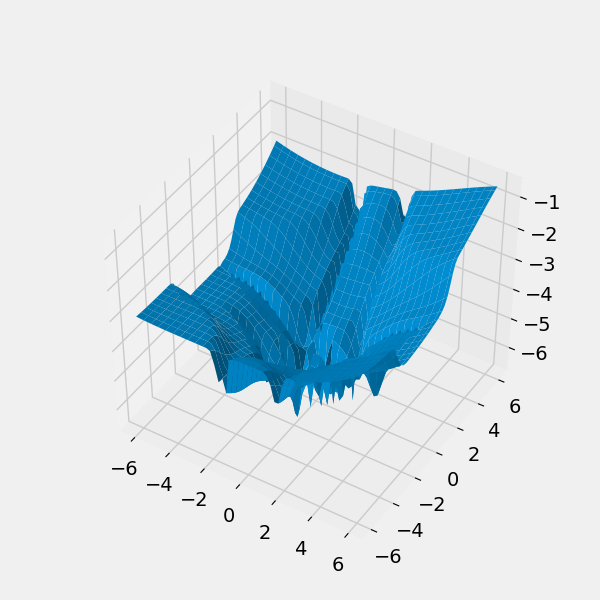

In [6]:
draw_surface(Fun1)

<IPython.core.display.Javascript object>


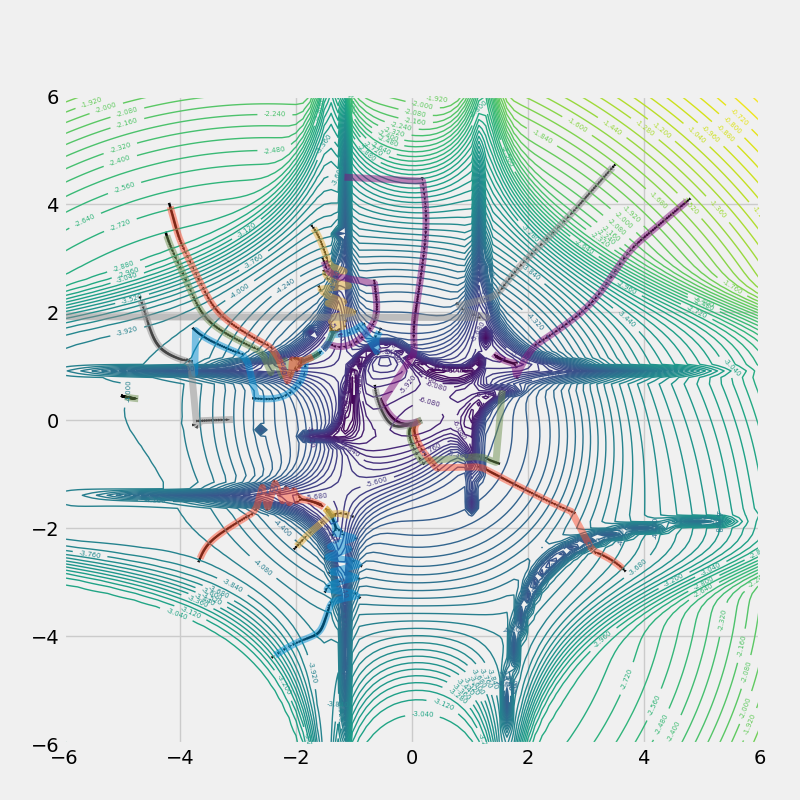

In [3]:
# GRADIENT DESCENT
animate(
    Fun1,
    training_loop(
        f=Fun1,
        opt=GradientDescent(
            initial_params=initial_params,
            learning_rate=0.1,
        ),
        n_steps=100
    )
)

<IPython.core.display.Javascript object>


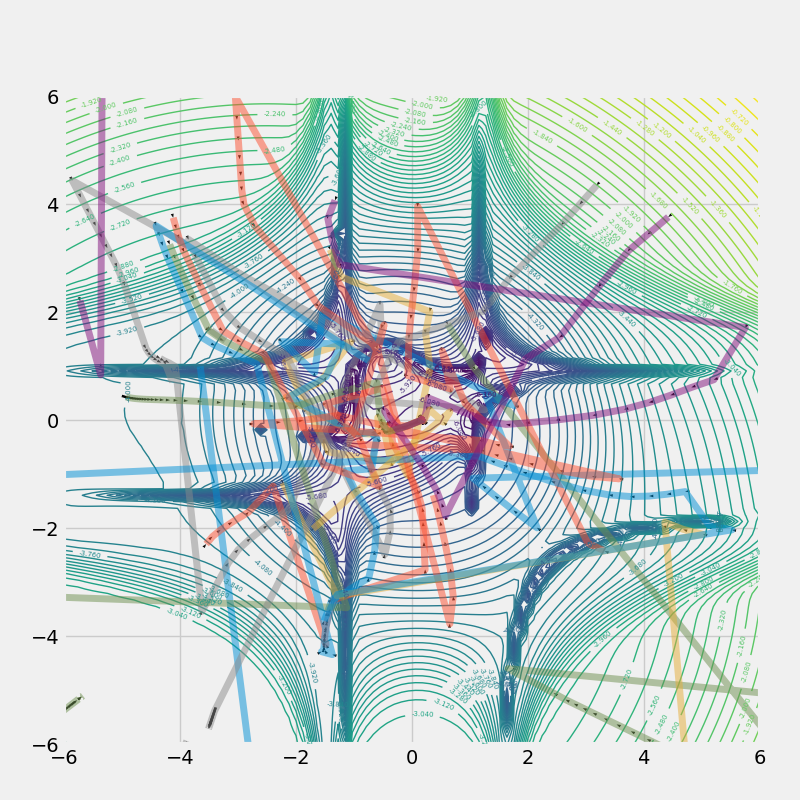

In [4]:
# GRADIENT DESCENT, ZA DUŻE LEARNING RATE
animate(
    Fun1,
    training_loop(
        f=Fun1,
        opt=GradientDescent(
            initial_params=initial_params,
            learning_rate=1.,
        ),
        n_steps=50
    )
)

<IPython.core.display.Javascript object>


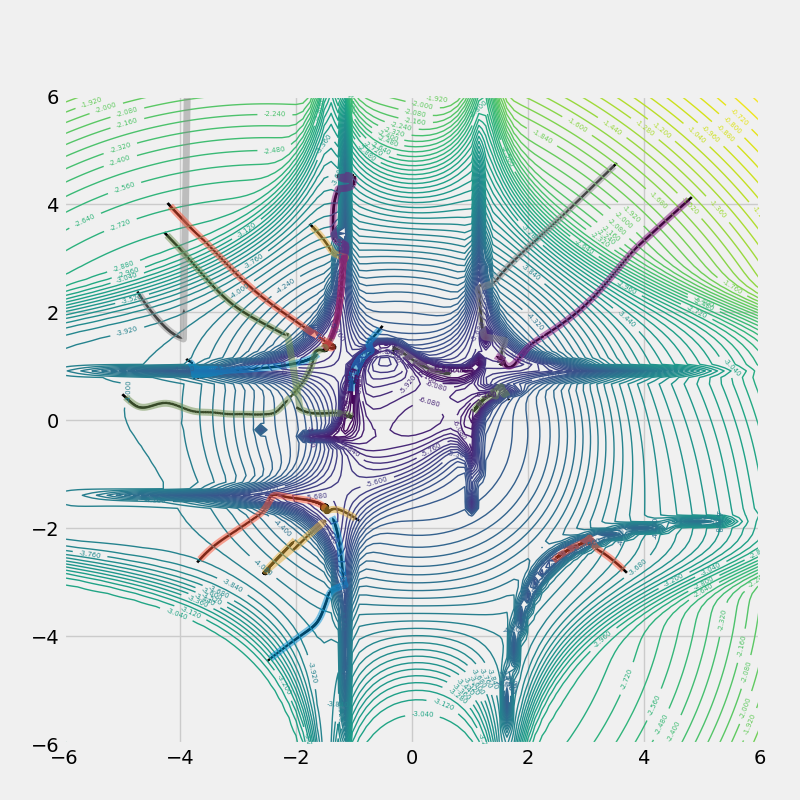

In [5]:
# ADAM
animate(
    Fun1,
    training_loop(
        f=Fun1,
        opt=Adam(
            initial_params=initial_params,
            learning_rate=0.01,
            beta1=.9,
            beta2=.999,
            epsilon=1e-8
        ),
        n_steps=200
    )
)